In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.metrics import (confusion_matrix, accuracy_score, 
                             precision_score, recall_score, 
                             f1_score, mean_absolute_error, 
                             classification_report,
                             mean_squared_error)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("strategeion_resume_skills.csv", dtype='int16')

# Preparação dos dados

In [3]:
df.drop(["Female", "URM", "Disability"], axis=1, inplace=True)

In [4]:
df.columns

Index(['Interview', 'Adobe Illustrator', 'Adobe Photoshop',
       'Agile Methodologies', 'Analytical Skills', 'Art', 'Art Direction',
       'Auditing', 'AutoCAD', 'Automation',
       ...
       'Web Applications', 'Web Design', 'Web Development', 'Windows',
       'Windows Server', 'Wireless Technologies', 'WordPress', 'Workshops',
       'Writing', 'Veteran'],
      dtype='object', length=220)

In [5]:
df.shape

(2605, 220)

In [6]:
df.head()

,Interview,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,...,Web Applications,Web Design,Web Development,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


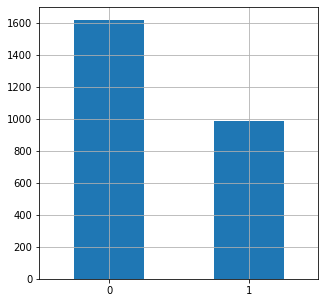

In [7]:
df['Veteran'].value_counts().plot.bar(figsize=(5,5), rot=0, grid=True);

# Modelos de testes

In [8]:
models = {
    'LogisticRegression': {'random_state': 42},
    'DecisionTreeClassifier': {'random_state': 42},
    'RandomForestClassifier': {'random_state': 42},
    'KNeighborsClassifier': {'n_neighbors': 3},
    'LinearSVC': {'random_state': 42},
    'MultinomialNB': {},
    'GaussianNB': {},
    'BernoulliNB': {},
    'XGBClassifier': {'use_label_encoder': False, 'eval_metric': 'mlogloss'},
}

In [9]:
def test_model(X_train, y_train, X_test, y_test, model_name, **kwargs):
    try:
        model = eval(model_name)(**kwargs)
        print(model)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        predict = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        report = classification_report(y_test, y_pred)
        return accuracy, predict, f1, report
    except ValueError:
        print(ValueError)
        return (0, 0, 0, 0)

In [10]:
X = df.drop(columns=['Veteran'], axis=1)
y = df['Veteran']

## Normal

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [12]:
print(f"Tamanho da amostra de treino {len(y_train)} e teste {len(y_test)}")

Tamanho da amostra de treino 1823 e teste 782


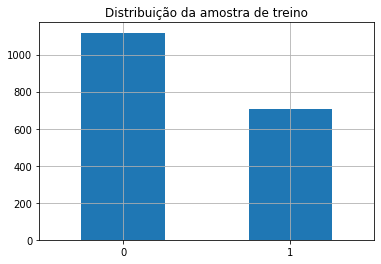

In [13]:
y_train.value_counts().plot.bar(grid=True, rot=0, title='Distribuição da amostra de treino');

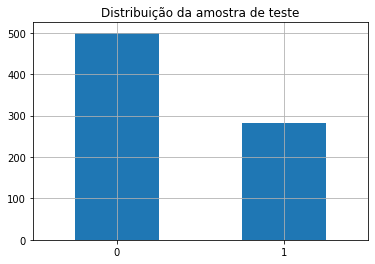

In [14]:
y_test.value_counts().plot.bar(grid=True, rot=0, title='Distribuição da amostra de teste');

In [15]:
result = {}
for algorithm, params in models.items():
    result[algorithm] = test_model(X_train, y_train, X_test, y_test, model_name=algorithm, **params)

LogisticRegression(random_state=42)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
KNeighborsClassifier(n_neighbors=3)
LinearSVC(random_state=42)
MultinomialNB()
GaussianNB()
BernoulliNB()
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='mlogloss', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)


In [16]:
for key, values in result.items():
    print(key, values[0])

LogisticRegression 0.8567774936061381
DecisionTreeClassifier 0.7480818414322251
RandomForestClassifier 0.8670076726342711
KNeighborsClassifier 0.8069053708439897
LinearSVC 0.8631713554987213
MultinomialNB 0.8529411764705882
GaussianNB 0.8056265984654731
BernoulliNB 0.8580562659846548
XGBClassifier 0.850383631713555


In [17]:
del X_train, X_test, y_train, y_test

## Com StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [19]:
standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
del X_train

In [20]:
X_test_standard = standard.transform(X_test)
del X_test

In [21]:
result = {}
for algorithm, params in models.items():
    result[algorithm + '_standard'] = test_model(X_train_standard, y_train, X_test_standard, y_test, model_name=algorithm, **params)

LogisticRegression(random_state=42)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
KNeighborsClassifier(n_neighbors=3)
LinearSVC(random_state=42)


/home/ianmateus/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


MultinomialNB()
<class 'ValueError'>
GaussianNB()
BernoulliNB()
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='mlogloss', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)


In [22]:
for key, values in result.items():
    if '_standard' in key:
        print(key, values[0])

LogisticRegression_standard 0.8388746803069054
DecisionTreeClassifier_standard 0.7480818414322251
RandomForestClassifier_standard 0.8670076726342711
KNeighborsClassifier_standard 0.520460358056266
LinearSVC_standard 0.8554987212276215
MultinomialNB_standard 0
GaussianNB_standard 0.8056265984654731
BernoulliNB_standard 0.8580562659846548
XGBClassifier_standard 0.850383631713555


In [23]:
del standard, X_train_standard, X_test_standard, y_train, y_test

## Com PCA

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [25]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
del X_train

In [26]:
X_test_pca = pca.transform(X_test)
del X_test

In [27]:
result = {}
for algorithm, params in models.items():
    result[algorithm + '_pca'] = test_model(X_train_pca, y_train, X_test_pca, y_test, model_name=algorithm, **params)

LogisticRegression(random_state=42)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
KNeighborsClassifier(n_neighbors=3)
LinearSVC(random_state=42)
MultinomialNB()
<class 'ValueError'>
GaussianNB()
BernoulliNB()
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='mlogloss', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)


In [28]:
for key, values in result.items():
    if '_pca' in key:
        print(key, values[0])

LogisticRegression_pca 0.8670076726342711
DecisionTreeClassifier_pca 0.7378516624040921
RandomForestClassifier_pca 0.860613810741688
KNeighborsClassifier_pca 0.8132992327365729
LinearSVC_pca 0.8670076726342711
MultinomialNB_pca 0
GaussianNB_pca 0.8644501278772379
BernoulliNB_pca 0.8644501278772379
XGBClassifier_pca 0.8414322250639387


In [29]:
del pca, X_train_pca, X_test_pca, y_train, y_test

## Analise dos resultados

In [30]:
key_model_max_acc = max(result, key=result.get)

In [31]:
print(f'Modelo com melhor accuracy foi {key_model_max_acc}\nAccuracy: {result[key_model_max_acc][0]}')
print(f'**Report**\n{result[key_model_max_acc][-1]}')

Modelo com melhor accuracy foi LogisticRegression_pca
Accuracy: 0.8670076726342711
**Report**
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       500
           1       0.87      0.74      0.80       282

    accuracy                           0.87       782
   macro avg       0.87      0.84      0.85       782
weighted avg       0.87      0.87      0.86       782



### Resultados estratificado

Modelo com melhor accuracy foi LogisticRegression_pca

Accuracy: 0.8427109974424553

**Report**

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       486
           1       0.83      0.74      0.78       296

    accuracy                           0.84       782
   macro avg       0.84      0.82      0.83       782
weighted avg       0.84      0.84      0.84       782